<a href="https://colab.research.google.com/github/Jaseelkt007/Signal_processing/blob/main/Denoising_using_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

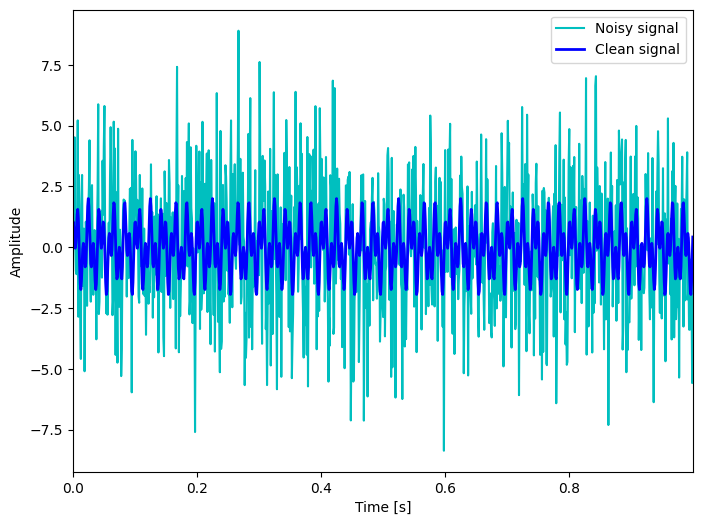

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams.update({'font.size': 10})

dt =0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*120*t)
# f = np.sin(2*np.pi*50*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t, f, color='c', linewidth=1.5, label='Noisy signal')
plt.plot(t, f_clean, color='b', linewidth=2, label='Clean signal')
plt.legend()
plt.xlim(t[0],t[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

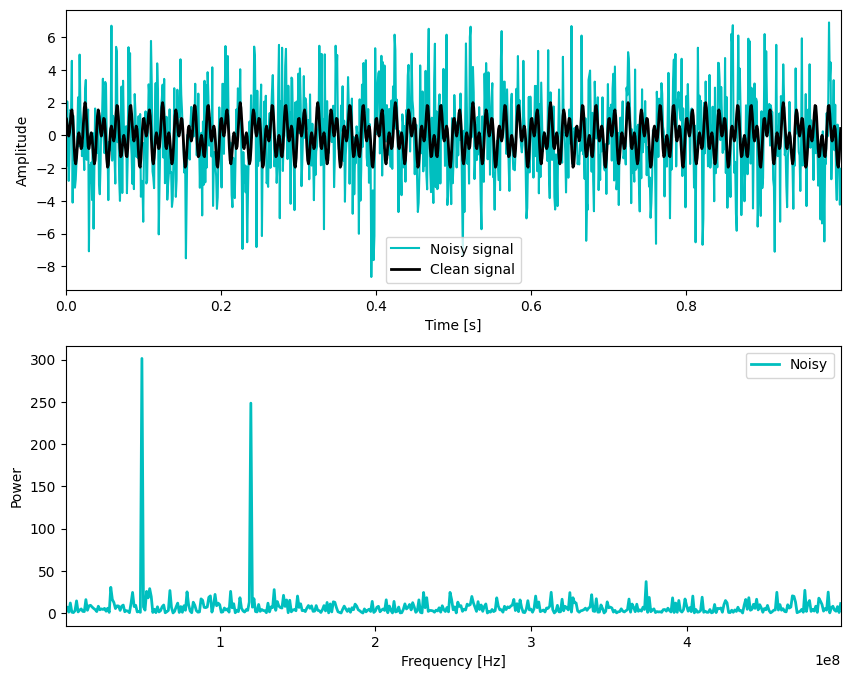

In [29]:
plt.rcParams.update({'font.size': 10})
n= len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat)/n
freq = (1/dt*n) * np.arange(n)
#plot the complete fft
L = np.arange(1, np.floor(n/2), dtype ='int')

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f,color='c', linewidth=1.5, label='Noisy signal')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean signal')
plt.legend()
plt.xlim(t[0],t[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.show()


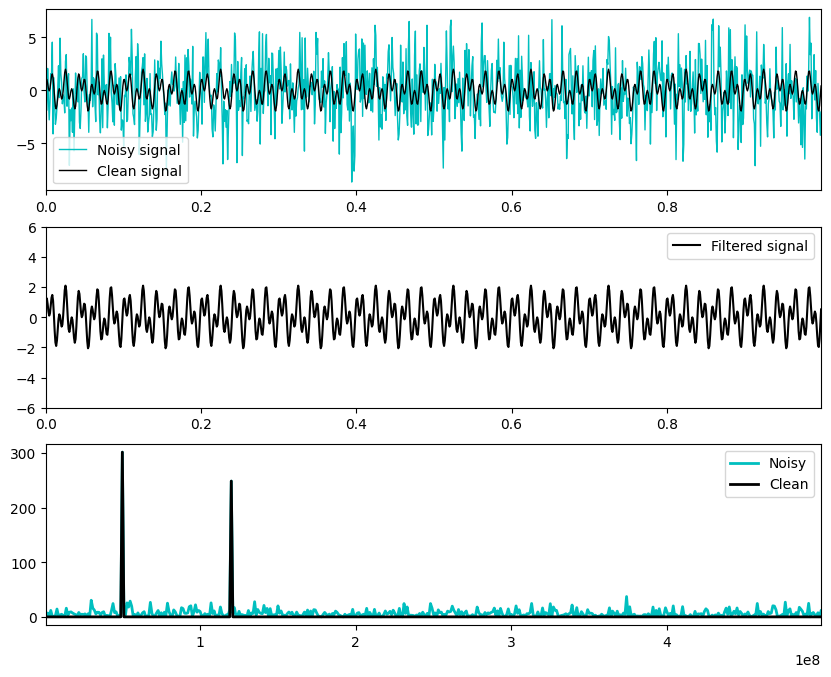

In [30]:
plt.rcParams.update({'font.size': 10})
filter = PSD > 100 # Find all frequency with large power
PSDclean = PSD * filter # zero out all others
fhat =  fhat * filter # zero out small fourier coeffs
filtered_time_signal = np.fft.ifft(fhat)
## Plots
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f,color='c', linewidth=1, label='Noisy signal')
plt.plot(t, f_clean, color='k', linewidth=1, label='Clean signal')
plt.legend()
plt.xlim(t[0],t[-1])

plt.sca(axs[1])
plt.plot(t, filtered_time_signal,color='k', linewidth=1.5, label='Filtered signal')
plt.xlim(t[0],t[-1])
plt.ylim(-6,6)
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', linewidth=2, label='Clean')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()
